## 데이터 탐색

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'AppleGothic'

picher_file_path = './data/picher_stats_2017.csv'
batter_file_path = './data/batter_stats_2017.csv'

picher = pd.read_csv(picher_file_path) # 투수
batter = pd.read_csv(batter_file_path) # 타자


print(picher.columns)
print()
print(batter.columns)

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

Index(['선수명', '팀명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)',
       '연봉(2017)'],
      dtype='object')


In [2]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

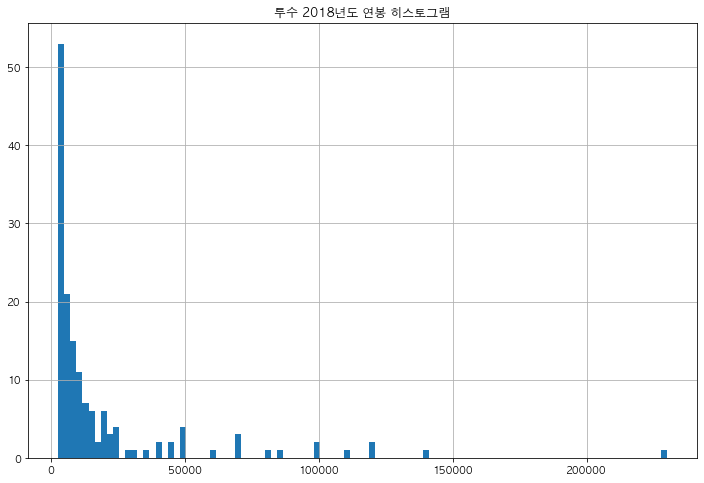

In [3]:
plt.figure(figsize = (12, 8))
picher['연봉(2018)'].hist(bins=100)
plt.title('투수 2018년도 연봉 히스토그램')
plt.show()

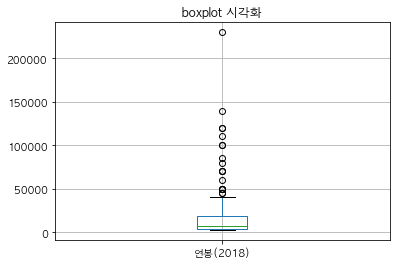

In [4]:
picher.boxplot(column=['연봉(2018)'])
plt.title('boxplot 시각화')
plt.show()

    - 연봉의 분포 확인한 결과 : 5억 밑에가 일반적, 매우 불균형함

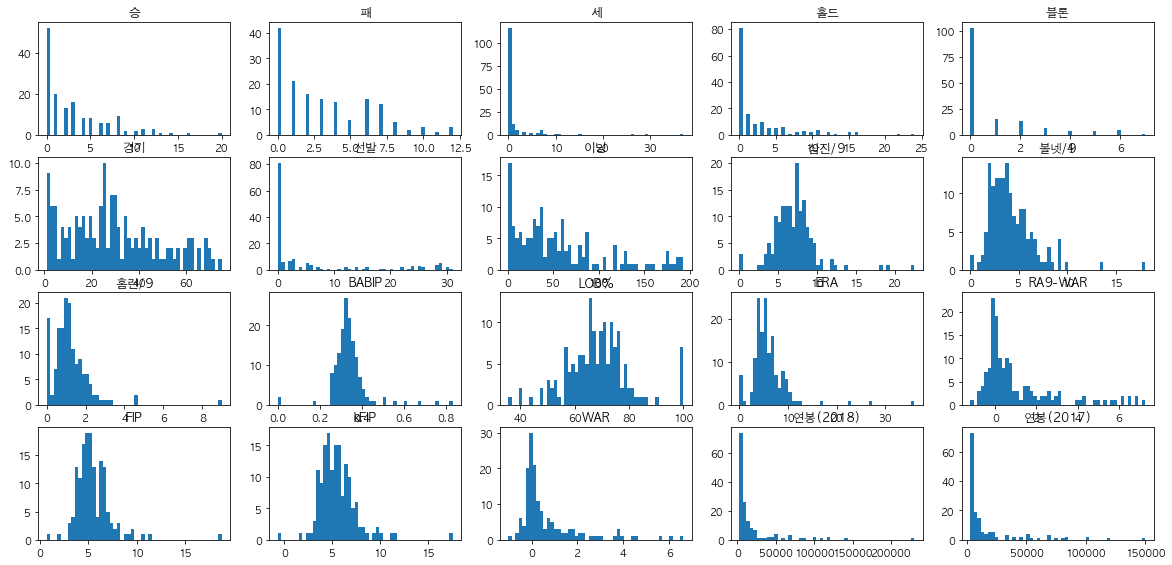

In [5]:
picher_features_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9',
                            'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2018)', '연봉(2017)']]

def plot_hist_each_colimns(df):
    fig = plt.figure(1, figsize=(20, 12))
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()
    
plot_hist_each_colimns(picher_features_df)

In [6]:
picher_features_df.shape

(152, 20)

## 투수의 연봉 예측하기

## Feature Scaling

### 수치형 변수 표준화

In [7]:
## 수치형 변수 표준화
# from sklearn.preprocessing import StandardScaler

def standard_scaling(df, scale_columns):
    for col in scale_columns:
        col_mean = df[col].mean()
        col_std = df[col].std()
        
        df[col] = df[col].apply(lambda x: (x-col_mean) / col_std)
    return df

numeric_columns = []
for col in picher.columns:
    if col =='선수명' or col =='팀명' or col =='연봉(2018)':
        pass
    else:
        numeric_columns.append(col)
        
picher_df = standard_scaling(picher, numeric_columns)
picher_df = picher_df.rename(columns={'연봉(2018)' : 'y'})
picher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


### 범주형 변수 -> One-Hot Encoding

In [8]:
team_one_hot = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명', axis=1)
picher_df = picher_df.join(team_one_hot)

picher_df.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,...,2.734705,0,0,0,0,1,0,0,0,0
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,...,1.337303,0,0,1,0,0,0,0,0,0
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,...,5.329881,1,0,0,0,0,0,0,0,0
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,...,3.333592,0,0,1,0,0,0,0,0,0
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,...,2.734705,0,0,0,0,0,0,1,0,0


### train / test set 분리

In [9]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

X = picher_df[picher_df.columns.difference(['선수명', 'y'])]
y = picher_df['y']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'train X shape : {train_x.shape}\nTest X shape : {test_x.shape}')
print(f'train y shape : {train_y.shape}\nTest y shape : {test_y.shape}')

train X shape : (121, 28)
Test X shape : (31, 28)
train y shape : (121,)
Test y shape : (31,)


### 회귀 분석 계수 학습 & 학습된 회귀 계수 출력

In [10]:
linear = linear_model.LinearRegression()

linear = linear.fit(train_x, train_y)

print(linear.coef_)

[ -1863.27167152   1147.15608757 -52147.32574794   5915.51391759
   2299.44885884  -1744.6150334     397.17996335   -249.60365919
  -1024.27838506    399.1396206   12274.79760529  44088.31585256
  -3602.91866901  -5319.02202278    617.34035282   4644.19380296
    879.30541662  -3936.74747195   1521.68382584 -10999.04385918
   -700.8303505    4526.7078132   21785.5776696    6965.59101874
    154.91380911   2018.54543747  -1217.59759673   9090.86143072]


In [11]:
print('컬럼별 회귀 계수')
display(pd.Series(data=linear.coef_, index=X.columns))

컬럼별 회귀 계수


BABIP       -1863.271672
ERA          1147.156088
FIP        -52147.325748
KIA          5915.513918
KT           2299.448859
LG          -1744.615033
LOB%          397.179963
NC           -249.603659
RA9-WAR     -1024.278385
SK            399.139621
WAR         12274.797605
kFIP        44088.315853
경기          -3602.918669
두산          -5319.022023
롯데            617.340353
볼넷/9         4644.193803
블론            879.305417
삼성          -3936.747472
삼진/9         1521.683826
선발         -10999.043859
세            -700.830351
승            4526.707813
연봉(2017)    21785.577670
이닝           6965.591019
패             154.913809
한화           2018.545437
홀드          -1217.597597
홈런/9         9090.861431
dtype: float64

### 평가 : 예측 모델 평가

In [12]:
## sm.OLS

import statsmodels.api as sm

train_x_const = sm.add_constant(train_x)
model = sm.OLS(train_y, train_x_const).fit()

model.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     47.38
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           4.02e-43
Time:                        21:07:29   Log-Likelihood:                -1268.6
No. Observations:                 121   AIC:                             2593.
Df Residuals:                      93   BIC:                             2671.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         1.7e+04    834.138     20.376      0.000    1.53e+04    1.87e+04
BABIP      -1863.2717   1613.607     -1.155      0.251   -5067.575    1341.032
ERA         1147.1561   2783.168      0.412      0.681   -4379.664    6673.976
FIP        -5.215e+04   1.04e+05     -0.501      0.618   -2.59e+05    1.55e+05
KIA         7803.9703   3057.328      2.553      0.012    1732.722    1.39e+04
KT          4187.9052   2632.015      1.591      0.115   -1038.755    9414.566
LG           143.8413   2919.308      0.049      0.961   -5653.325    5941.008
LOB%         397.1800   1889.296      0.210      0.834   -3354.587    4148.947
NC          1638.8527   2979.707      0.550      0.584   -4278.254    7555.960
RA9-WAR    -1024.2784   3243.497     -0.316      0.753   -7465.220    5416.663
SK          2287.5960   2768.775      0.826      0.411   -3210.643    7785.835
WAR         1.227e+04   2849.066      4.308      0.000    6617.118    1.79e+04
kFIP        4.409e+04   8.88e+04      0.497      0.621   -1.32e+05     2.2e+05
경기         -3602.9187   3635.487     -0.991      0.324   -1.08e+04    3616.437
두산         -3430.5657   2757.660     -1.244      0.217   -8906.733    2045.601
롯데          2505.7967   3014.505      0.831      0.408   -3480.414    8492.007
볼넷/9        4644.1938   6679.685      0.695      0.489   -8620.336    1.79e+04
블론           879.3054   1506.355      0.584      0.561   -2112.017    3870.628
삼성         -2048.2911   2661.719     -0.770      0.444   -7333.938    3237.356
삼진/9        1521.6838   8494.807      0.179      0.858   -1.53e+04    1.84e+04
선발           -1.1e+04   6355.123     -1.731      0.087   -2.36e+04    1620.970
세           -700.8304   1766.608     -0.397      0.692   -4208.963    2807.302
승           4526.7078   2820.864      1.605      0.112   -1074.969    1.01e+04
연봉(2017)    2.179e+04   1354.925     16.079      0.000    1.91e+04    2.45e+04
이닝          6965.5910   7732.807      0.901      0.370   -8390.230    2.23e+04
패            154.9138   2184.662      0.071      0.944   -4183.391    4493.219
한화          3907.0018   2668.928      1.464      0.147   -1392.960    9206.964
홀드         -1217.5976   1746.941     -0.697      0.488   -4686.676    2251.481
홈런/9        9090.8614   1.79e+04      0.508      0.613   -2.65e+04    4.46e+04
==============================================================================
Omnibus:                       27.027   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.274
Skew:                          -0.097   Prob(JB):                     9.05e-54
Kurtosis:                       9.958   Cond. No.                     3.21e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [13]:
import seaborn as sns

Text(0, 0.5, 'coef')

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


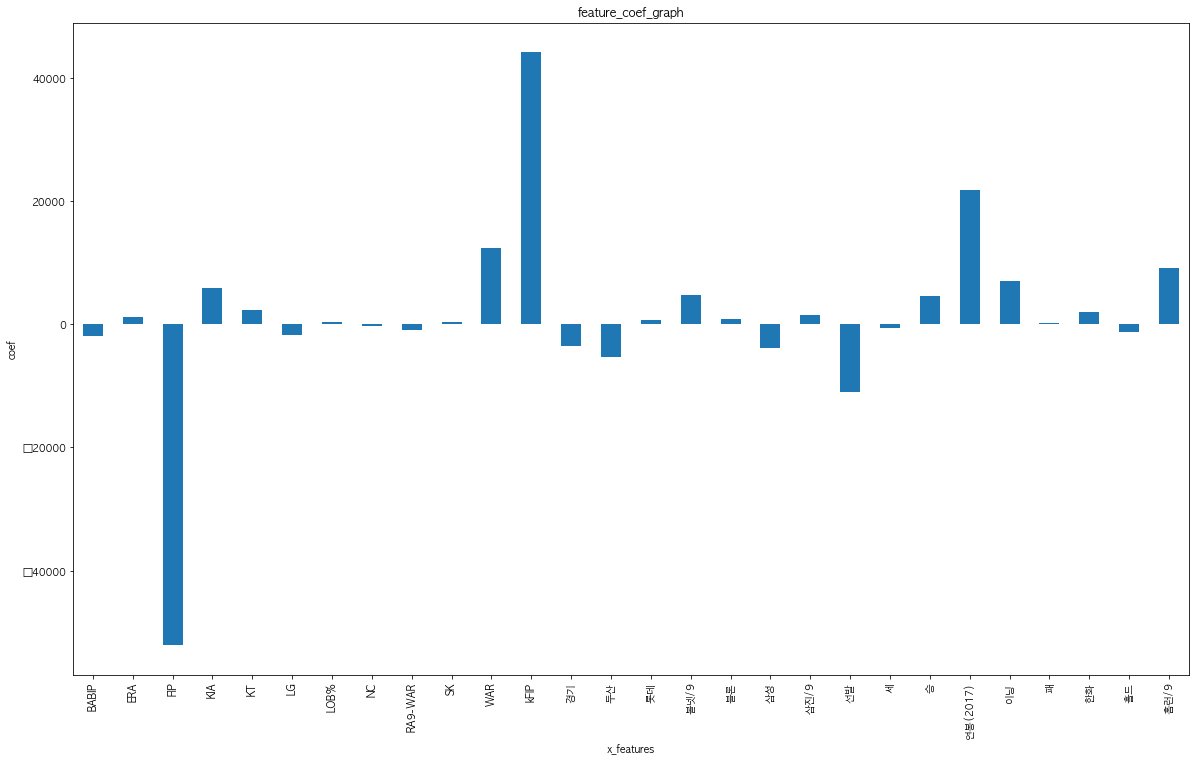

In [14]:
# featrue 중요도 확인

feature_coef = pd.Series(data=linear.coef_, index=train_x.columns)

plt.figure(figsize = (20, 12))
plt.rcParams['font.family'] = 'AppleGothic'
ax = feature_coef.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')


            coef	  std   err	       t	P>|t|	  [0.025	0.975]
    const	1.7e+04	834.138	20.376	0.000	1.53e+04	1.87e+04
    BABIP	-1863.2717	1613.607	-1.155	0.251	-5067.575	1341.032
    ERA	1147.1561	2783.168	0.412	0.681	-4379.664	6673.976
    FIP	-5.215e+04	1.04e+05	-0.501	0.618	-2.59e+05	1.55e+05
    KIA	7803.9703	3057.328	2.553	0.012	1732.722	1.39e+04
    KT	4187.9052	2632.015	1.591	0.115	-1038.755	9414.566
    LG	143.8413	2919.308	0.049	0.961	-5653.325	5941.008
    LOB%	397.1800	1889.296	0.210	0.834	-3354.587	4148.947
    NC	1638.8527	2979.707	0.550	0.584	-4278.254	7555.960
    RA9-WAR	-1024.2784	3243.497	-0.316	0.753	-7465.220	5416.663
    SK	2287.5960	2768.775	0.826	0.411	-3210.643	7785.835
    WAR	1.227e+04	2849.066	4.308	0.000	6617.118	1.79e+04
    kFIP	4.409e+04	8.88e+04	0.497	0.621	-1.32e+05	2.2e+05
    경기	-3602.9187	3635.487	-0.991	0.324	-1.08e+04	3616.437
    두산	-3430.5657	2757.660	-1.244	0.217	-8906.733	2045.601
    롯데	2505.7967	3014.505	0.831	0.408	-3480.414	8492.007
    볼넷/9	4644.1938	6679.685	0.695	0.489	-8620.336	1.79e+04
    블론	879.3054	1506.355	0.584	0.561	-2112.017	3870.628
    삼성	-2048.2911	2661.719	-0.770	0.444	-7333.938	3237.356
    삼진/9	1521.6838	8494.807	0.179	0.858	-1.53e+04	1.84e+04
    선발	-1.1e+04	6355.123	-1.731	0.087	-2.36e+04	1620.970
    세	-700.8304	1766.608	-0.397	0.692	-4208.963	2807.302
    승	4526.7078	2820.864	1.605	0.112	-1074.969	1.01e+04
    연봉(2017)	2.179e+04	1354.925	16.079	0.000	1.91e+04	2.45e+04
    이닝	6965.5910	7732.807	0.901	0.370	-8390.230	2.23e+04
    패	154.9138	2184.662	0.071	0.944	-4183.391	4493.219
    한화	3907.0018	2668.928	1.464	0.147	-1392.960	9206.964
    홀드	-1217.5976	1746.941	-0.697	0.488	-4686.676	2251.481
    홈런/9	9090.8614	1.79e+04	0.508	0.613	-2.65e+04	4.46e+04


    - WAR : p-value 유의미한 영향 / 1.227e+04
    - 작년 연봉 : p-value 유의미한 영향 / 2.179e+04
    - 팀(한화) : p-value 유의미한 영향 / 3907.0018

In [15]:
print(f'Train R_squared : {linear.score(train_x, train_y)}')
print(f'Test R_squared : {linear.score(test_x, test_y)}')

Train R_squared : 0.9322281224002373
Test R_squared : 0.7553039258172332


In [16]:
y_pred_tr = linear.predict(train_x)
y_pred_te = linear.predict(test_x)

print(f'train RMSE : {sqrt(mean_squared_error(train_y, y_pred_tr))}')
print(f'test RMSE : {sqrt(mean_squared_error(test_y, y_pred_te))}')

train RMSE : 8650.141349496096
test RMSE : 9042.13357522599


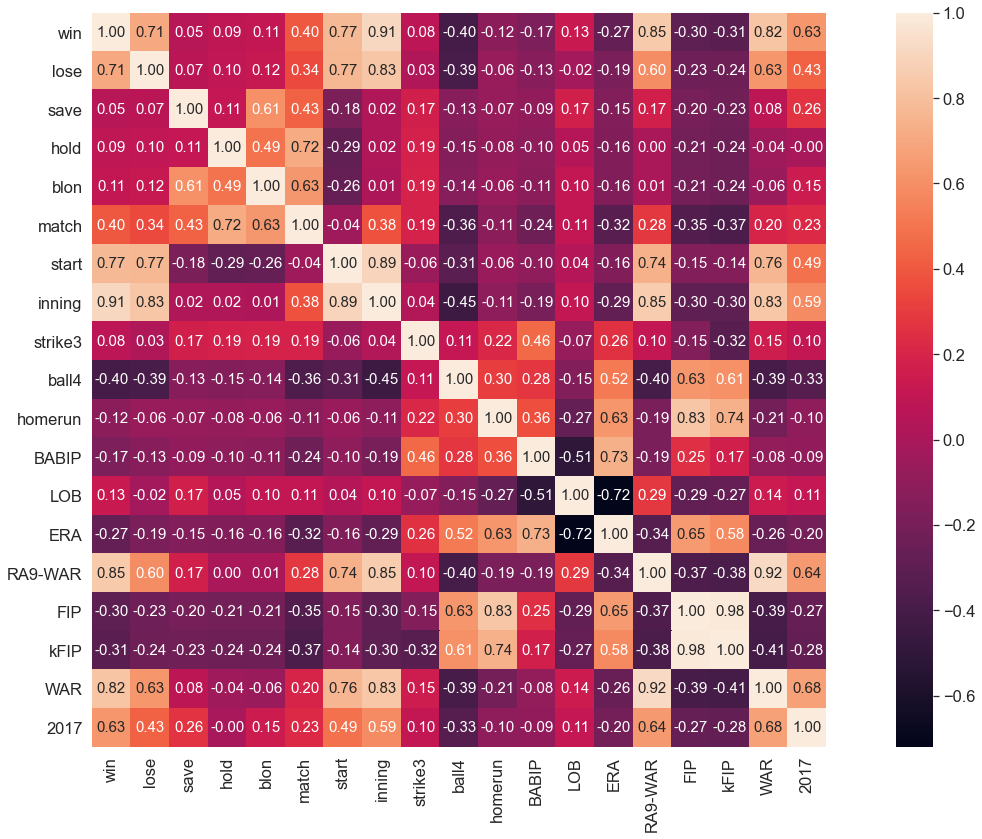

In [17]:
corr = picher_df[numeric_columns].corr(method='pearson')
show_cols = ['win', 'lose', 'save', 'hold', 'blon', 'match',
            'start', 'inning', 'strike3', 'ball4', 'homerun','BABIP', 'LOB',
            'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR' ,'2017']

sns.set(font_scale=1.5)
plt.figure(figsize=(20, 12))
heatmap = sns.heatmap(corr.values,
                     cbar = True,
                     annot = True,
                     square = True,
                     fmt = '.2f',
                     annot_kws = {'size' : 15},
                     yticklabels=show_cols,
                     xticklabels=show_cols)

plt.tight_layout()
plt.show()

### 다중공선성 확인 

In [18]:
# variance_inflation_factor(exog, exog.i)
# parameter : x들과 검사할 x
from statsmodels.stats.outliers_influence import variance_inflation_factor



# Feature 마다 VIF(분산팽창요인) 확인
vif = pd.DataFrame()

vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

## FIP, RA9-WAR, kFIP, 이닝, 홈런/9

,VIF Factor,features
0,3.2,BABIP
1,10.6,ERA
2,14238.3,FIP
3,1.1,KIA
4,1.1,KT
5,1.1,LG
6,4.3,LOB%
7,1.1,NC
8,13.6,RA9-WAR
9,1.1,SK


## 다시 예측해보고 시각화하기

In [19]:
# 2018년 연봉 예측
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
X

,FIP,WAR,볼넷/9,삼진/9,연봉(2017)
0,-0.971030,4.503142,-0.869000,0.672099,2.734705
1,-1.061888,4.094734,-0.987502,0.134531,1.337303
2,-0.837415,3.761956,-0.885929,0.109775,5.329881
3,-0.698455,2.998081,-0.945180,0.350266,3.333592
4,-0.612941,2.809003,-0.877464,0.155751,2.734705
...,...,...,...,...,...
147,0.375810,-0.859111,-0.373829,-0.968896,-0.335587
148,0.482702,-0.874237,0.603817,-0.777918,-0.535215
149,1.348527,-0.964995,0.307561,-0.756699,-0.020173
150,0.728554,-1.033063,1.196330,0.205264,-0.543201


In [20]:
linear = linear_model.LinearRegression()

X = X[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]

linear = linear.fit(X, y)
pred_2018 = linear.predict(X)
picher_df['예측연봉(2018)'] = pred_2018

picher = pd.read_csv(picher_file_path)
picher = picher[['선수명', '연봉(2017)']]

result_df = picher_df.sort_values('y', ascending=False)
result_df.drop(['연봉(2017)'], inplace=True, axis=1)
result_df = result_df.merge(picher, on=['선수명'], how='left')
result_df = result_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]
result_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']

result_df.head()

,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,양현종,230000,175422.521901,150000
1,켈리,140000,123520.521205,85000
2,소사,120000,88045.021101,50000
3,정우람,120000,118722.858314,120000
4,레일리,111000,107323.720067,85000


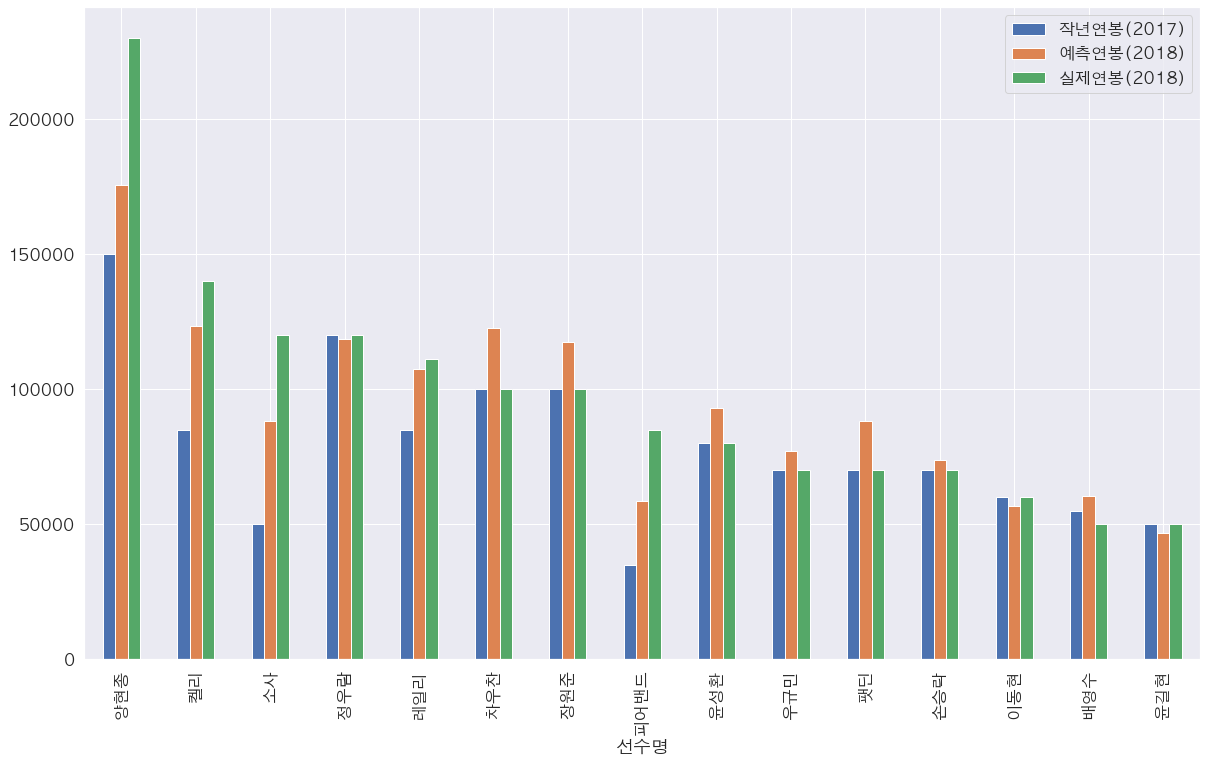

In [21]:
plt.rcParams['font.family'] = 'AppleGothic'
result_df.head(15).plot(x='선수명', y=['작년연봉(2017)', '예측연봉(2018)', '실제연봉(2018)'], kind='bar', figsize=(20, 12))
plt.show()